In [ ]:
import matplotlib.pyplot as mpl
# mpl.use('Qt5Agg')

from nilearn.datasets import fetch_atlas_smith_2009
from modl.input_data.fmri.fixes import monkey_patch_nifti_image

monkey_patch_nifti_image()

import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.model_selection import train_test_split

from modl.decomposition.fmri import fMRIDictFact, rfMRIDictionaryScorer
from modl.plotting.fmri import display_maps
from modl.utils.system import get_cache_dirs

import ibc_public
import os
import glob
import nibabel as nib
from nilearn import image

from nilearn import plotting
from nilearn.image import index_img

In [24]:
# Task of interest
task = 'clips'

# Any specific files that should be used for FastSRM
if task == 'clips':
    sessn = 3
    filepattern = '*Trn*.nii.gz'
else:
    sessn = 2
    filepattern = '*.nii.gz'

In [3]:
n_components = 20
batch_size = 50
learning_rate = .92
method = 'masked'
step_size = 0.01
reduction = 12
alpha = 1e-3
n_epochs = 2
verbose = 15
n_jobs = 2
smoothing_fwhm = 6
memory = Memory(cachedir=get_cache_dirs()[0], verbose=2)

/home/sshankar/env/modl/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/sshankar/cache'", use "location='/home/sshankar/cache'" instead.
  if sys.path[0] == '':


In [4]:
dict_init = fetch_atlas_smith_2009().rsn20

In [ ]:
from nilearn import image
di = image.load_img(dict_init)
di.shape

In [5]:
_package_directory = os.path.dirname(os.path.abspath(ibc_public.__file__))
mask = nib.load(os.path.join(_package_directory, '../ibc_data', 'gm_mask_3mm.nii.gz'))

In [ ]:
msk = image.load_img(mask)
msk.shape

In [ ]:
get_cache_dirs()[0]

In [14]:
######
# This bit is for testing the script with one run per subject
######

# Now create a list of movie session files 
movie_dir = os.path.join('..', task, '3mm/')
subs = sorted(glob.glob(movie_dir + 'sub*'))

movie_arrays = []

# Create list with paths and names of all nii.gz files to 
# provide as input to MODL
for s, sub in enumerate(subs):
    if os.path.isdir(sub):
        sub_arrays = []
        sess = sorted(glob.glob(sub + '/ses*'))
        ses = sess[0]
        if os.path.isdir(ses):
            movie_imgs = sorted(glob.glob(ses + '/' + filepattern))
            sub_arrays = movie_imgs[0]
        movie_arrays.append(sub_arrays)

In [25]:
######
# This bit is for when the script is working fine
######

# Now create a list of movie session files 
movie_dir = os.path.join('..', task, '3mm/')
subs = sorted(glob.glob(movie_dir + 'sub*'))

movie_arrays = []

# Create a list with all nii.gz files related to the task at hand
for s, sub in enumerate(subs):
    if os.path.isdir(sub):
        sub_arrays = []
        sess = sorted(glob.glob(sub + '/ses*'))
        for i, ses in enumerate(sess):
            if os.path.isdir(ses) and i < sessn:
                movie_imgs = sorted(glob.glob(ses + '/' + filepattern))
                for mi, mimg in enumerate(movie_imgs):
                    movie_arrays.append(mimg)
#                     sub_arrays.append(mimg)
#         movie_arrays.append(sub_arrays)

In [ ]:
movie_arrays

In [26]:
import pandas as pd
mov_df = pd.DataFrame(data=movie_arrays).values

In [ ]:
mov_df

In [ ]:
type(mov_df)

In [ ]:
train_data, test_data = train_test_split(mov_df, test_size=1, random_state=0)
train_imgs = zip(*train_data)
test_imgs = zip(*test_data)
mask = mask

In [ ]:
cb = rfMRIDictionaryScorer(test_imgs)

In [27]:
dict_fact = fMRIDictFact(smoothing_fwhm=smoothing_fwhm,
                         standardize=True,
                         high_pass=1./128,
                         t_r=2.0,
                         step_size=step_size,
                         mask=mask,
                         memory_level=2,
                         method=method,
                         verbose=verbose,
                         n_epochs=n_epochs,
                         n_jobs=n_jobs,
                         random_state=1,
                         n_components=n_components,
                         dict_init=dict_init,
                         positive=True,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         reduction=reduction,
                         alpha=alpha,
                         memory=memory
                         )

In [32]:
fMRIDictFact?

In [28]:
files_ = tuple([x[0] for x in mov_df])
files_

('../clips/3mm/sub-01/ses-06/wrdcsub-01_ses-06_task-ClipsTrn01_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-06/wrdcsub-01_ses-06_task-ClipsTrn02_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-06/wrdcsub-01_ses-06_task-ClipsTrn03_acq-ap_bold.nii.gz',
 '../clips/3mm/sub-01/ses-08/wrdcsub-01_ses-08_task-ClipsTrn04_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-08/wrdcsub-01_ses-08_task-ClipsTrn05_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-08/wrdcsub-01_ses-08_task-ClipsTrn06_acq-ap_bold.nii.gz',
 '../clips/3mm/sub-01/ses-09/wrdcsub-01_ses-09_task-ClipsTrn07_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-09/wrdcsub-01_ses-09_task-ClipsTrn08_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-01/ses-09/wrdcsub-01_ses-09_task-ClipsTrn09_acq-ap_bold.nii.gz',
 '../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn01_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn02_acq-pa_bold.nii.gz',
 '../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn03_acq-ap_bold.n

In [29]:
dict_fact.fit(files_)

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Memory]81852.8s, 1364.2min: Loading resample_img...
[Memory]81855.4s, 1364.3min: Loading unmask...
________________________________________________________________________________
[Memory] Calling modl.decomposition.fmri._compute_components...
_compute_components(MultiNiftiMasker(detrend=True, dtype=None, high_pass=0.0078125, low_pass=None,
                 mask_args=None,
                 mask_img=<modl.input_data.fmri.fixes.Nifti1Image object at 0x7f22ad353eb8>,
                 mask_strategy='background',
                 memory=Memory(location=/home/sshankar/cache/joblib),
                 memory_level=1, n_jobs=2, smoothing_fwhm=6, standardize=True,
                 t_r=2.0, target_affine=None, target_shape=None, verbose=15), 
( '../clips/3mm/sub-01/ses-06/wrdcsub-01_ses-06_task-ClipsTrn01_acq-pa_bold.nii.gz',
  '../clips/3mm/sub-01/ses-06/wrdcsub-01_ses-06_task-ClipsTrn02_acq-pa_bold.nii.g

../clips/3mm/sub-11/ses-07/wrdcsub-11_ses-07_task-ClipsTrn09_acq-ap_bold.nii.gz
../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn01_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn02_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn03_acq-ap_bold.nii.gz
../clips/3mm/sub-12/ses-06/wrdcsub-12_ses-06_task-ClipsTrn04_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-06/wrdcsub-12_ses-06_task-ClipsTrn05_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-06/wrdcsub-12_ses-06_task-ClipsTrn06_acq-ap_bold.nii.gz
../clips/3mm/sub-12/ses-07/wrdcsub-12_ses-07_task-ClipsTrn07_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-07/wrdcsub-12_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
../clips/3mm/sub-12/ses-07/wrdcsub-12_ses-07_task-ClipsTrn09_acq-ap_bold.nii.gz
../clips/3mm/sub-13/ses-05/wrdcsub-13_ses-05_task-ClipsTrn01_acq-pa_bold.nii.gz
../clips/3mm/sub-13/ses-05/wrdcsub-13_ses-05_task-ClipsTrn02_acq-pa_bold.nii.gz
../clips/3mm/sub-13/ses-05/wrdcsub-13_se

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.5s, 0.1min
<class 'numpy.ndarray'>
[[-0.04351079 -0.08641925 -0.04309857 ... -0.01007378 -0.03442134
  -0.0546964 ]
 [ 0.6815235   0.4690935  -1.4287823  ... -1.5459213  -2.050431
  -1.2905592 ]
 [ 0.7834776   0.86976373 -1.5461053  ... -2.3257346  -3.0863364
  -2.4893851 ]
 ...
 [-0.37846765 -0.11704893 -0.70682    ... -0.77163243 -1.5036054
  -1.8323823 ]
 [-0.29771465 -1.4015696   0.18625341 ...  0.4167628  -0.12716508
  -1.2418824 ]
 [-0.28753623 -0.45671412 -0.14950977 ... -0.2425607  -0.11109369
  -0.15931761]]
../clips/3mm/sub-11/ses-04/wrdcsub-11_ses-04_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.8s, 0.1min
<class 'numpy.ndarray'>
[[-0.02905967  0.00913888 -0.0069673  ... -0.03441408 -0.00989132
   0.01015153]
 [ 0.90166974  1.7853932  -0.0848395  ... -0.5016203  -0.28176564
   0.07269491]
 [-1.210148   -2.012899   -0.18453342 ... -1.0896461  -1.5856751
  -1.0828303 ]
 ...
 [ 0.55693775 -0.7197834   2.9835653  ...  0.31601474  0.098749
   0.45959863]
 [-1.306133   -3.0070143   4.230319   ...  0.77951574 -0.5826546
  -0.71735716]
 [ 0.37849435  0.29125735  0.42643094 ...  0.08635902 -0.01020828
   0.26989588]]
../clips/3mm/sub-13/ses-07/wrdcsub-13_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[ 0.07798208  0.0163699   0.0766234  ...  0.06842486  0.09042293
   0.10287847]
 [-1.8622595   0.25291905 -1.2809848  ... -1.8487557  -0.7742042
  -0.05837076]
 [-1.661001   -0.2877851  -1.5960125  ... -2.826383   -2.618981
  -1.3583517 ]
 ...
 [-1.5678358  -1.5449786   0.09930836 ... -0.574828   -1.6731251
  -2.6908324 ]
 [-0.4627102  -0.56098956  1.0397749  ... -1.0044616  -1.9679098
  -1.761212  ]
 [ 0.152512   -0.03405694  0.1320722  ...  0.18408862  0.00430007
  -0.17738208]]
../clips/3mm/sub-15/ses-08/wrdcsub-15_ses-08_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl.

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.5s, 0.1min
<class 'numpy.ndarray'>
[[-0.05027266 -0.11004117  0.12672015 ...  0.00794239  0.06851059
   0.0611542 ]
 [-1.6022538  -0.8147728   0.5392283  ... -2.3048737  -1.35412
  -0.87905663]
 [-1.1271405  -0.6469916  -0.2454758  ... -2.7748952  -1.7077513
  -0.9704167 ]
 ...
 [ 0.8622435   1.2514259   1.8422204  ... -0.94370544  0.08115124
   0.4454477 ]
 [ 0.7986529   1.1325704  -0.5797419  ... -0.85453546 -0.239629
  -0.43089363]
 [-0.11921043 -0.19331698 -0.20037594 ...  0.27185622  0.23193331
   0.15595278]]
../clips/3mm/sub-08/ses-07/wrdcsub-08_ses-07_task-ClipsTrn09_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl.i

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.5s, 0.1min
<class 'numpy.ndarray'>
[[-0.13416603 -0.17228517 -0.18829505 ... -0.04335095 -0.06177866
  -0.13687082]
 [ 0.4065096  -0.56177455 -0.38930383 ... -1.9862608  -0.71630114
   0.87715507]
 [ 0.68824494 -0.43566892  0.48124722 ... -1.3832943  -0.24807192
   0.9348393 ]
 ...
 [-0.6653838  -0.11380383 -1.2151772  ...  1.1912229   1.8749399
   2.5827613 ]
 [ 0.771755    0.31414583 -0.8760947  ... -0.29391044  0.29036555
   0.6241864 ]
 [ 0.11849833  0.14253068  0.2705182  ...  0.09176411  0.2581724
   0.24692953]]
../clips/3mm/sub-09/ses-08/wrdcsub-09_ses-08_task-ClipsTrn07_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mo

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.4s, 0.1min
<class 'numpy.ndarray'>
[[-0.07584579 -0.10155171 -0.1687604  ... -0.12314022 -0.04399925
   0.01341764]
 [-1.9049685  -1.3079586  -0.27373824 ... -0.6018756  -1.5292548
  -1.3796368 ]
 [-1.4075624  -1.4113777   0.01586553 ...  0.28351197 -1.091144
  -1.3987621 ]
 ...
 [-0.15848477  0.6792282  -0.5301271  ...  2.06815     1.1715596
   2.3610466 ]
 [-0.82632756 -0.97694415  0.45464966 ... -0.13217011  0.31884417
   0.7145149 ]
 [-0.26932403 -0.12782851 -0.5853746  ...  0.24110956  0.07674988
   0.01285946]]
../clips/3mm/sub-14/ses-09/wrdcsub-14_ses-09_task-ClipsTrn09_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.4s, 0.1min
<class 'numpy.ndarray'>
[[-0.02105344 -0.02125504  0.10760523 ...  0.07874328  0.09475328
   0.13486466]
 [-0.6138121  -1.5072548  -1.397097   ... -1.1753558   0.8905566
   1.8651663 ]
 [-0.05324667 -1.2283832  -0.7365179  ... -0.8326689   1.1919695
   1.331225  ]
 ...
 [-0.05143277  0.2683829   0.61670095 ... -0.85863084 -1.4194839
  -1.0832883 ]
 [-0.89161056 -1.0574716   0.71308637 ... -1.0345932  -0.9898081
  -0.93837893]
 [-0.10322426 -0.04716527  0.02547805 ...  0.2432662   0.11131963
  -0.03859591]]
Record 34
../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn02_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[-0.05807896 -0.05988393  0.02281932 ... -0.05843149 -0.0009354
   0.01982069]
 [ 0.40559405 -0.11179277 -0.6352427  ...  0.03045803 -0.30381912
  -0.09570875]
 [ 0.06821145  0.2894698   0.53853416 ... -0.3367606  -0.4308185
   0.49339333]
 ...
 [-0.26401734 -0.36958548 -0.63722444 ... -0.41849178 -0.63390464
  -0.8065339 ]
 [ 0.09435572  0.80052656 -0.68665266 ... -0.2130591  -0.6590838
  -0.790545  ]
 [-0.03986541 -0.01419492 -0.16848923 ...  0.03171074 -0.02717363
   0.05934957]]
../clips/3mm/sub-04/ses-05/wrdcsub-04_ses-05_task-ClipsTrn02_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mod

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[ 0.01567617  0.0335498  -0.00995852 ...  0.01798413 -0.01731085
  -0.04649206]
 [-0.94994825 -0.55333835 -0.7094331  ... -1.2461721  -1.7160021
  -1.1487612 ]
 [-0.6566611  -0.55803764 -0.04083815 ... -0.92821693 -1.5833071
  -1.099073  ]
 ...
 [-0.2259633   0.20592293 -1.907378   ... -1.2745502  -1.1377612
  -1.3463567 ]
 [ 0.63466007  0.73415476 -0.16079977 ... -0.6284797   0.01244283
  -0.12885194]
 [-0.08731453  0.01812309 -0.09000751 ... -0.31065705 -0.14805342
  -0.01391407]]
../clips/3mm/sub-06/ses-06/wrdcsub-06_ses-06_task-ClipsTrn04_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mod

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[-3.63918133e-02  9.36779252e-05 -9.64210182e-02 ... -1.21903606e-01
  -1.02292076e-01 -6.76136911e-02]
 [-9.11199629e-01 -1.75743592e+00 -9.65480685e-01 ...  5.24557494e-02
  -3.03009927e-01 -1.29865095e-01]
 [-1.85640883e+00 -2.16014791e+00 -1.33558989e+00 ... -1.40498078e+00
  -1.55364835e+00 -1.07113171e+00]
 ...
 [ 8.82527292e-01  7.72732079e-01 -1.08412653e-01 ... -2.18389146e-02
  -2.58976936e-01 -1.12240380e-02]
 [-1.05615854e-01 -8.46655443e-02 -2.32227969e+00 ... -1.76181114e+00
  -8.24408293e-01 -4.79555875e-01]
 [ 2.52249181e-01  2.34763041e-01  7.01313615e-02 ... -1.50841892e-01
  -1.90714791e-01 -2.58648127e-01]]
../clips/3mm/sub-08/ses-05/wrdcsub-08_ses-05_task-ClipsTrn02_acq-pa_bold.nii.gz
<class 'str'>
______________________

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[ 0.04760348  0.04547667  0.05694092 ...  0.13124222  0.09368338
   0.08329292]
 [-2.1785393  -2.285677   -0.2615881  ... -1.4548365  -1.5657682
   0.21253179]
 [-1.2008327  -1.1298729  -0.74058396 ...  0.16561328  1.1603642
   2.0786695 ]
 ...
 [-0.7092767  -0.4859257  -1.4813114  ...  1.7159493   1.0863296
   0.7917581 ]
 [-0.6814219   0.29706135 -0.05324497 ...  1.5141084   2.2774699
   2.1976657 ]
 [-0.01140412  0.18408783  0.13110079 ...  0.1292989   0.10368834
  -0.02368905]]
../clips/3mm/sub-11/ses-06/wrdcsub-11_ses-06_task-ClipsTrn06_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.8s, 0.1min
<class 'numpy.ndarray'>
[[-0.01824521 -0.01104618 -0.11275092 ... -0.04568578 -0.03255353
   0.02411298]
 [-0.79353106 -0.9111446   1.1427537  ...  1.929226    2.2431014
   0.89753574]
 [-0.7325441  -2.5535703   0.89894706 ...  1.3278366   1.8390876
   1.7652688 ]
 ...
 [-1.4213787  -2.1314619  -0.27350157 ... -1.0702171  -1.5388402
  -2.0407844 ]
 [-1.4189428  -0.63020045 -0.7730837  ... -0.11801644 -0.13542625
  -0.49285826]
 [-0.00807597 -0.056662    0.35853082 ... -0.46517277 -0.5228573
  -0.468908  ]]
../clips/3mm/sub-14/ses-07/wrdcsub-14_ses-07_task-ClipsTrn02_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[ 5.1845629e-02  1.3488743e-01 -1.0084996e-01 ... -1.4496355e-01
  -8.7968446e-02 -1.0195109e-03]
 [-8.8265657e-01 -8.3706594e-01 -4.9328566e-01 ...  5.8523971e-01
   1.6871072e+00  2.3340278e+00]
 [-1.1693388e+00 -1.8594366e+00  1.1418164e+00 ...  2.3443599e+00
   2.2513011e+00  2.1906936e+00]
 ...
 [ 8.2692868e-01  4.1053948e-01  1.6344688e+00 ...  7.1852130e-01
   7.1395278e-01  2.5343376e-01]
 [-8.8616544e-01 -1.0226476e+00  9.1084337e-01 ... -7.4282110e-01
  -1.2310747e+00 -1.1312033e+00]
 [ 1.4535668e-01  2.2606054e-01  2.2931972e-01 ... -2.3707171e-01
  -5.0865199e-02  1.0049701e-01]]
../clips/3mm/sub-07/ses-07/wrdcsub-07_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
__________________________________________________________

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.8s, 0.1min
<class 'numpy.ndarray'>
[[-0.10655628 -0.07963818  0.1012928  ...  0.06158885  0.05911965
  -0.01028818]
 [-0.82815367  0.13841772  0.20116302 ... -0.96048355 -0.07423175
   0.01211074]
 [-0.02489041 -1.0568253   1.3060406  ... -0.78419024 -0.97159344
  -0.7780265 ]
 ...
 [ 1.0283158   0.6143892   0.64039963 ... -0.94366974 -1.1909463
  -0.4327013 ]
 [ 0.24620286  1.8334072  -0.37835184 ... -0.8818773  -1.1263658
  -0.9386212 ]
 [-0.17843276 -0.27952936 -0.3266639  ...  0.3715175   0.35597137
   0.19105172]]
../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mo

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[ 0.01300331 -0.04921681  0.00334691 ... -0.07589306 -0.05256817
  -0.05676941]
 [ 0.6869813   0.6677035   0.90249753 ...  1.4484476   0.20426573
   0.7858408 ]
 [-0.8629238  -0.59445924  0.3250514  ... -0.46591103 -2.650924
  -1.8684819 ]
 ...
 [-1.5577011  -1.00478     0.02080532 ... -1.341173   -0.99969333
  -0.2848134 ]
 [-0.4668209  -0.14653589  0.9180811  ... -0.95315325 -1.5925354
  -1.1482327 ]
 [ 0.50523555  0.31787625  0.06019995 ...  0.01026067  0.06808861
  -0.10302377]]
../clips/3mm/sub-14/ses-09/wrdcsub-14_ses-09_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mod

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[-0.02623415 -0.05238551 -0.05051423 ...  0.01874436 -0.0262357
  -0.05676182]
 [-1.9919063  -1.433479   -2.1838021  ... -2.7995892  -1.8112189
  -0.51644135]
 [-1.5064939   0.87260413 -1.4164742  ... -0.5845929  -0.67217004
   0.34478194]
 ...
 [ 0.42704588  0.75384635 -0.49577445 ... -0.8126101  -0.44698545
  -0.6534893 ]
 [-1.0651674  -0.3083317  -1.5301709  ... -1.1099547   0.25666916
  -0.75273985]
 [ 0.14393763  0.2709603   0.17713463 ...  0.37461916  0.41155618
   0.4580528 ]]
../clips/3mm/sub-01/ses-09/wrdcsub-01_ses-09_task-ClipsTrn09_acq-ap_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mo

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[ 0.01514049 -0.02731632 -0.03114373 ... -0.13769881 -0.07538402
  -0.02576521]
 [ 1.2426462   2.2615216  -1.1779358  ...  0.5777383   0.47039947
  -0.15641792]
 [ 1.369016    1.9172407   0.11598526 ... -1.447273   -0.33889472
  -0.35765496]
 ...
 [-1.9260573  -0.02355167 -3.2004106  ... -1.4673798  -2.2851582
  -2.8574107 ]
 [-0.5310663   0.1958479  -0.19513656 ... -2.3334076  -0.46823332
   1.0277773 ]
 [-0.41624743 -0.19861674 -0.35180044 ... -0.06482115 -0.02382985
   0.05239238]]
Record 84
../clips/3mm/sub-04/ses-06/wrdcsub-04_ses-06_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_a

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[ 0.02303416 -0.02229639  0.06887013 ...  0.084718    0.03462954
  -0.01520606]
 [ 0.9075909   1.2529594   0.4203033  ...  1.5971117   1.8611778
   1.816724  ]
 [ 0.4229816   0.07218395  0.65255684 ...  1.168026    1.7414623
   1.6421518 ]
 ...
 [-0.03542831 -0.63079154  0.99122584 ...  1.6401606   1.1296386
   0.5994348 ]
 [ 0.74176973  1.3010812   2.3869848  ...  1.9550737   2.9151971
   1.9511783 ]
 [ 0.11355519  0.06490029 -0.15265574 ...  0.23031862 -0.242037
  -0.3626072 ]]
../clips/3mm/sub-02/ses-08/wrdcsub-02_ses-08_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl.i

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[ 0.03218547  0.0824625  -0.12822418 ...  0.05972559  0.072118
   0.07452168]
 [-2.5550058  -2.1194065  -1.7293324  ... -0.2376258  -1.072413
  -1.6902431 ]
 [-3.182364   -2.9545228  -2.7970395  ... -0.81016034 -1.1589177
  -0.98329437]
 ...
 [-0.33946338 -0.1705226  -0.85907173 ...  0.29366574 -1.037698
  -1.9887627 ]
 [-0.03871501  0.40399802 -0.67656106 ...  0.19861537 -1.0118376
  -0.5629053 ]
 [ 0.25547782  0.3631143   0.13184527 ...  0.12830098  0.09251174
   0.11047344]]
../clips/3mm/sub-14/ses-08/wrdcsub-14_ses-08_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<modl.inp

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.5s, 0.1min
<class 'numpy.ndarray'>
[[-6.5452360e-02 -6.1916489e-02 -2.6687520e-02 ... -4.6608265e-02
   1.3646825e-02  2.7080093e-02]
 [-1.4210600e+00 -1.3301830e+00  1.0025194e+00 ...  1.0033110e+00
  -3.4303370e-01 -1.1112249e+00]
 [-1.2162111e+00 -1.5491074e+00  1.3363975e+00 ...  5.8409500e-01
   1.6493697e-01 -1.1925683e+00]
 ...
 [-4.9364495e-01 -6.1820132e-01  2.5942721e+00 ... -1.1164638e-01
  -2.0034890e+00 -2.7156212e+00]
 [-5.2619183e-01 -6.1936241e-01  8.7498325e-01 ... -1.1829282e+00
  -7.5120384e-01 -7.5961995e-01]
 [ 7.1199313e-02  6.0535621e-02 -1.3680466e-01 ... -8.5162841e-02
  -9.7436795e-04  2.9243492e-02]]
../clips/3mm/sub-12/ses-06/wrdcsub-12_ses-06_task-ClipsTrn04_acq-pa_bold.nii.gz
<class 'str'>
__________________________________________________________

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[-0.02715026 -0.06507095 -0.01901335 ... -0.02522813 -0.00633822
  -0.02116514]
 [-0.6161353  -0.5543258  -0.07250032 ... -2.14136    -1.0817332
   1.5204333 ]
 [-1.9609956  -1.5064921  -1.2243398  ... -1.4406922  -0.80400234
  -0.38543624]
 ...
 [-0.67241114 -0.5210931   0.52041435 ... -1.4263837  -0.7512925
   0.7112325 ]
 [-0.541926    0.38594016 -0.25735337 ... -1.0830156  -0.4499606
   0.3547811 ]
 [-0.22545712 -0.14739847 -0.23463719 ... -0.02988105 -0.03405061
  -0.1506384 ]]
../clips/3mm/sub-04/ses-07/wrdcsub-04_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mod

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.6s, 0.1min
<class 'numpy.ndarray'>
[[-0.0449525  -0.06607649  0.10254581 ... -0.01702942 -0.02052567
  -0.04188688]
 [-0.27632242  0.3540356  -0.6265707  ... -0.50297105 -0.23600028
  -1.2106954 ]
 [-1.9628248  -1.495472   -1.2934896  ... -1.7546297  -1.2034948
  -1.5222446 ]
 ...
 [ 1.0330317   1.1672069   0.66263133 ... -0.48161745 -1.6927565
  -1.2444991 ]
 [ 2.2787938   1.9520772   0.7497883  ...  1.2839183   0.67203844
   0.6442018 ]
 [ 0.11019085 -0.0041645   0.0802847  ...  0.20780446  0.18728697
   0.01369577]]
../clips/3mm/sub-02/ses-09/wrdcsub-02_ses-09_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mo

[MultiNiftiMasker.our_transform_single_imgs] Extracting region signals
[MultiNiftiMasker.our_transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 6.7s, 0.1min
<class 'numpy.ndarray'>
[[-0.04381705 -0.06648748  0.02184941 ... -0.02971823  0.03478641
   0.09375964]
 [ 2.3150728   2.1524184   0.9016156  ...  0.16472174 -0.439052
  -0.8120805 ]
 [ 1.4006494   1.4537219   0.6278353  ...  0.52665687 -0.18930015
  -0.72607225]
 ...
 [-1.5815679  -2.3333385  -0.80657494 ... -0.80150306  0.27427086
   0.6187258 ]
 [-0.91381186 -1.7796746  -2.124016   ... -0.5079887   0.6857025
   0.91168773]
 [ 0.09321115 -0.2809248  -0.04266201 ...  0.21249993  0.19707757
   0.3370201 ]]
../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn01_acq-pa_bold.nii.gz
<class 'str'>
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<mod

../clips/3mm/sub-11/ses-07/wrdcsub-11_ses-07_task-ClipsTrn07_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83086.1s, 1384.8min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.13496134  0.10932067 -0.02027602 ... -0.07573479 -0.05797259
  -0.072627  ]
 [-1.7617908  -2.3007226  -0.7573453  ... -0.17948934 -0.32459378
  -0.03026228]
 [-1.1745268  -0.28284213 -0.48138136 ... -0.9124168  -0.7383793
   1.2264411 ]
 ...
 [-0.2502842   0.95542264 -0.45494658 ...  0.2637586   0.7838754
   1.6978179 ]
 [ 0.4305647   1.5575753  -0.24359195 ...  1.0473541   2.1450887
   2.0282447 ]
 [-0.24216048 -0.19371127 -0.41306224 ...  0.3756365   0.19771573
   0.16622488]]
../clips/3mm/sub-04/ses-06/wrdcsub-04_ses-06_task-ClipsTrn06_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83088.6s, 1384.8min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.06133709 -0.04238378  0.02506133 ... -0.10948922  0.02998452
  -0.06031149]
 [-0.23704049  0.06086764 -0.94973433 ... -1.0594689   0.1885081
  -0.87266505]
 [

[Memory]83114.0s, 1385.2min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.01798219 -0.03827518  0.03817752 ...  0.0049059  -0.00290294
  -0.01737765]
 [-0.9687641   0.26872173 -0.6098356  ... -0.6914354  -0.38325223
  -0.5943994 ]
 [-1.0390527   1.5215527  -0.97698015 ...  0.61260474  1.0589249
   0.61644703]
 ...
 [-0.58601284  0.34251633 -0.5507252  ... -1.1839637  -0.4285008
   0.8091796 ]
 [ 0.5622723   1.6770787  -0.87296337 ... -0.11953007 -0.54800016
  -2.0225067 ]
 [ 0.2542893  -0.12058879  0.04907724 ...  0.0640678  -0.00882286
   0.06237565]]
Record 134
../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn02_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83116.0s, 1385.3min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 1.9288080e-02  4.0803202e-03 -3.9127838e-02 ... -3.2664303e-02
  -1.7609740e-02  1.1010608e-02]
 [-2.0342507e+00  7.9143232e-01 -8.3801633e-01 ... -1.2928418e+00
  -1.1789297e+00 -1.0211263e+00]
 [ 4.3926781e-01  1.8359021e+00  1.0656838e+00 

../clips/3mm/sub-02/ses-07/wrdcsub-02_ses-07_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83140.5s, 1385.7min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-6.5452360e-02 -6.1916489e-02 -2.6687520e-02 ... -4.6608265e-02
   1.3646825e-02  2.7080093e-02]
 [-1.4210600e+00 -1.3301830e+00  1.0025194e+00 ...  1.0033110e+00
  -3.4303370e-01 -1.1112249e+00]
 [-1.2162111e+00 -1.5491074e+00  1.3363975e+00 ...  5.8409500e-01
   1.6493697e-01 -1.1925683e+00]
 ...
 [-4.9364495e-01 -6.1820132e-01  2.5942721e+00 ... -1.1164638e-01
  -2.0034890e+00 -2.7156212e+00]
 [-5.2619183e-01 -6.1936241e-01  8.7498325e-01 ... -1.1829282e+00
  -7.5120384e-01 -7.5961995e-01]
 [ 7.1199313e-02  6.0535621e-02 -1.3680466e-01 ... -8.5162841e-02
  -9.7436795e-04  2.9243492e-02]]
../clips/3mm/sub-06/ses-05/wrdcsub-06_ses-05_task-ClipsTrn01_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83142.8s, 1385.7min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.02671799  0.04162932  0.06079801 ...  0.1263028

../clips/3mm/sub-12/ses-06/wrdcsub-12_ses-06_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83168.3s, 1386.1min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.07584579 -0.10155171 -0.1687604  ... -0.12314022 -0.04399925
   0.01341764]
 [-1.9049685  -1.3079586  -0.27373824 ... -0.6018756  -1.5292548
  -1.3796368 ]
 [-1.4075624  -1.4113777   0.01586553 ...  0.28351197 -1.091144
  -1.3987621 ]
 ...
 [-0.15848477  0.6792282  -0.5301271  ...  2.06815     1.1715596
   2.3610466 ]
 [-0.82632756 -0.97694415  0.45464966 ... -0.13217011  0.31884417
   0.7145149 ]
 [-0.26932403 -0.12782851 -0.5853746  ...  0.24110956  0.07674988
   0.01285946]]
../clips/3mm/sub-14/ses-08/wrdcsub-14_ses-08_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83170.6s, 1386.2min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.03801783 -0.00916334 -0.02699842 ...  0.00743043  0.0147269
   0.05859327]
 [ 1.3801147   1.110144    0.10101525 ... -0.48739052  0.24754693
   0.25334576]
 [ 

../clips/3mm/sub-06/ses-06/wrdcsub-06_ses-06_task-ClipsTrn05_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83199.1s, 1386.7min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-3.63918133e-02  9.36779252e-05 -9.64210182e-02 ... -1.21903606e-01
  -1.02292076e-01 -6.76136911e-02]
 [-9.11199629e-01 -1.75743592e+00 -9.65480685e-01 ...  5.24557494e-02
  -3.03009927e-01 -1.29865095e-01]
 [-1.85640883e+00 -2.16014791e+00 -1.33558989e+00 ... -1.40498078e+00
  -1.55364835e+00 -1.07113171e+00]
 ...
 [ 8.82527292e-01  7.72732079e-01 -1.08412653e-01 ... -2.18389146e-02
  -2.58976936e-01 -1.12240380e-02]
 [-1.05615854e-01 -8.46655443e-02 -2.32227969e+00 ... -1.76181114e+00
  -8.24408293e-01 -4.79555875e-01]
 [ 2.52249181e-01  2.34763041e-01  7.01313615e-02 ... -1.50841892e-01
  -1.90714791e-01 -2.58648127e-01]]
../clips/3mm/sub-07/ses-05/wrdcsub-07_ses-05_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83201.5s, 1386.7min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.03383833  0

../clips/3mm/sub-14/ses-09/wrdcsub-14_ses-09_task-ClipsTrn09_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83226.2s, 1387.1min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.10717688  0.12838241  0.18464963 ...  0.06393792  0.06604414
   0.09236886]
 [-0.8446355  -2.6156383  -0.00852015 ...  1.2116228   1.1839198
  -0.0605142 ]
 [-0.608543   -2.264893   -0.62032145 ...  1.0798442   0.5113214
  -0.64355093]
 ...
 [ 1.7195295   0.7409921  -0.32381037 ...  0.3379706   1.380179
   0.5751097 ]
 [ 1.3430969   1.334002   -0.22410688 ... -0.37536928  0.23777787
  -0.83408654]
 [ 0.2957524   0.05174318  0.18681434 ...  0.25710395  0.28162333
   0.48425102]]
../clips/3mm/sub-05/ses-07/wrdcsub-05_ses-07_task-ClipsTrn07_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83228.6s, 1387.1min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.15520741 -0.20596668 -0.05665211 ...  0.01731415 -0.10210107
  -0.1903743 ]
 [-2.307795   -2.230118   -0.68062925 ... -1.3528832  -1.0599698
  -1.5449787 ]
 [-

../clips/3mm/sub-09/ses-08/wrdcsub-09_ses-08_task-ClipsTrn09_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83255.0s, 1387.6min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.06291678 -0.02568718 -0.048501   ...  0.01048228  0.03197956
   0.05753965]
 [-0.9270398  -1.0101006  -1.6896755  ... -0.95535004 -1.7437062
  -1.9112852 ]
 [-1.7702527  -0.9487209  -1.9508157  ...  3.024489    1.3121343
  -0.8254865 ]
 ...
 [-1.2867388  -0.8229017  -3.121309   ...  0.00651437 -0.14603497
  -0.16813669]
 [-0.44013444  0.09682379 -2.6492007  ...  1.3727586   1.2545668
   0.6477699 ]
 [-0.20608044 -0.18728282 -0.37904662 ...  0.20161134  0.12840575
  -0.09904591]]
../clips/3mm/sub-13/ses-05/wrdcsub-13_ses-05_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83257.4s, 1387.6min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.11174414  0.08391473 -0.07615721 ...  0.05085236 -0.00862362
  -0.05769307]
 [-0.02235469  0.7666993   1.3352278  ...  0.14641586  0.32550368
  -0.6275624 ]
 

../clips/3mm/sub-15/ses-08/wrdcsub-15_ses-08_task-ClipsTrn04_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83282.2s, 1388.0min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.04064818  0.01674962 -0.05308222 ... -0.19276929 -0.11450396
   0.06811725]
 [-0.04081767  0.48040074 -1.1459677  ... -0.7611983  -1.2889647
  -2.0267882 ]
 [-2.0275118  -1.5834006  -1.2265102  ... -1.5017715  -0.9072694
  -0.2229616 ]
 ...
 [ 0.3134286   0.752579    0.11526619 ...  0.09525518 -0.6142843
  -0.790474  ]
 [ 0.11759939 -0.5141803   0.70772666 ... -0.94988996 -1.5936002
  -1.42339   ]
 [ 0.44386682  0.47153747  0.187005   ...  0.04426488  0.05666111
   0.06815033]]
../clips/3mm/sub-05/ses-07/wrdcsub-05_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83284.7s, 1388.1min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.04760348  0.04547667  0.05694092 ...  0.13124222  0.09368338
   0.08329292]
 [-2.1785393  -2.285677   -0.2615881  ... -1.4548365  -1.5657682
   0.21253179]
 [-

../clips/3mm/sub-12/ses-05/wrdcsub-12_ses-05_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83311.6s, 1388.5min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.04522615  0.0670679   0.00822447 ... -0.03005473 -0.03299901
  -0.02794393]
 [-0.6066934   0.39628124  0.55782324 ... -0.48499757 -0.54112315
   0.1465879 ]
 [-0.4344678  -0.08108966  2.4632154  ...  1.1155411   0.53630006
  -0.15896907]
 ...
 [ 0.26653853 -0.01034652 -0.8693915  ... -1.4238676  -1.1140852
  -0.82022613]
 [-0.08385424 -0.7814841  -0.4435313  ...  0.61877525  1.4313221
   1.9683304 ]
 [-0.23613405 -0.29355556 -0.08883967 ... -0.44159734 -0.13830765
   0.11381578]]
../clips/3mm/sub-12/ses-07/wrdcsub-12_ses-07_task-ClipsTrn08_acq-pa_bold.nii.gz
<class 'str'>
[Memory]83313.7s, 1388.6min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[ 0.01797779  0.0227213   0.00460935 ...  0.04889511  0.01552346
  -0.0287731 ]
 [ 0.5632824   0.5395678  -0.28059265 ...  1.6266998   1.9518802
   2.0014448 ]
 

../clips/3mm/sub-11/ses-04/wrdcsub-11_ses-04_task-ClipsTrn03_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83339.2s, 1389.0min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.00508583 -0.0622771   0.00543283 ... -0.0366437  -0.00761109
   0.02637238]
 [-1.0096221   0.36569056 -0.04606026 ... -0.90710324 -0.6791427
   0.6550669 ]
 [ 0.19550951  0.03332587  1.5229758  ... -0.930075   -0.03633702
  -0.51441026]
 ...
 [-1.1178789  -2.0025997   0.49299026 ... -2.0336442  -1.7213767
  -0.42773795]
 [-0.8855725  -2.5348425   0.90086913 ... -0.54367656 -0.81618017
  -0.89594775]
 [ 0.03262671  0.07887141 -0.22638316 ... -0.3658692  -0.22161011
  -0.09444086]]
../clips/3mm/sub-07/ses-06/wrdcsub-07_ses-06_task-ClipsTrn06_acq-ap_bold.nii.gz
<class 'str'>
[Memory]83341.6s, 1389.0min: Loading filter_and_mask...
<class 'numpy.ndarray'>
[[-0.02715026 -0.06507095 -0.01901335 ... -0.02522813 -0.00633822
  -0.02116514]
 [-0.6161353  -0.5543258  -0.07250032 ... -2.14136    -1.0817332
   1.5204333 ]
 

fMRIDictFact(alpha=0.001, batch_size=50, callback=None, detrend=True,
             dict_init='/home/sshankar/nilearn_data/smith_2009/rsn20.nii.gz',
             high_pass=0.0078125, learning_rate=0.92, low_pass=None,
             mask=<modl.input_data.fmri.fixes.Nifti1Image object at 0x7f22ad353eb8>,
             mask_args=None, mask_strategy='background',
             memory=Memory(location=/home/sshankar/cache/joblib),
             memory_level=2, method='masked', n_components=20, n_epochs=2,
             n_jobs=2, positive=True, random_state=1, reduction=12,
             smoothing_fwhm=6, standardize=True, step_size=0.01, t_r=2.0,
             target_affine=None, target_shape=None, transform_batch_size=None,
             verbose=15)

In [ ]:
dict_fact.components_img_.shape

In [ ]:
for i in range(n_components):
    plotting.plot_stat_map(index_img(dict_fact.components_img_, i), colorbar=False,
                  threshold=0)

In [20]:
# Save the component images to disk after first 
# creating a 'modl' directory for results
os.mkdir(os.path.join(movie_dir, 'modl'))

for i in range(n_components):
    nib.save(index_img(dict_fact.components_img_, i),
            os.path.join(movie_dir, 'modl', 'component-' + str(i) + '.nii.gz'))

/home/sshankar/env/modl/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: linewidths is ignored by contourf
  **kwargs)
/home/sshankar/env/modl/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/sshankar/env/modl/lib/python3.6/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


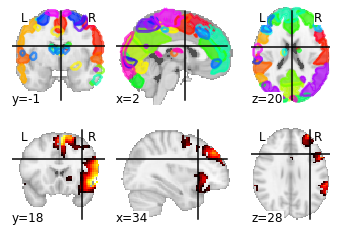

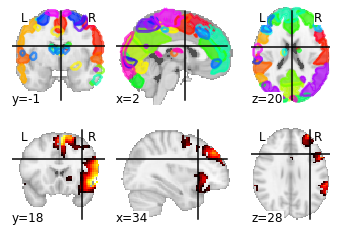

In [21]:
fig = plt.figure()
display_maps(fig, dict_fact.components_img_)

In [31]:
fig.savefig(os.path.join(movie_dir, 'modl', 'component_fig.pdf'), format='pdf')